<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/22b_regression_dirty%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A4%91%EA%B3%A0%EC%B0%A8%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 거래가 기입된 년도
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도
    
    
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

 

## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝
    - 데이터 정규화
    - XGBoost

## EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'mjkimcs'
os.environ['KAGGLE_KEY'] = '47adf959b8d9d52a7332fb2dff639854'

In [ ]:
!rm *.* # 현재 폴더에 있는 모든 파일을 삭제
!kaggle datasets download -d austinreese/craigslist-carstrucks-data
!unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
 94% 250M/267M [00:05<00:00, 35.6MB/s]
100% 267M/267M [00:05<00:00, 54.4MB/s]
Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


In [ ]:
df = pd.read_csv('vehicles.csv')

In [ ]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [ ]:
df.isna().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [ ]:
df.describe()

# price의 mean과 median 비교, min, max를 보면 이상한 것을 감지

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'VIN',
         'image_url', 'description', 'state', 'lat', 
         'long', 'posting_date'], axis=1, inplace=True)

In [ ]:
# 'year' 컬럼을 'age' 컬럼으로 변경하기

df['age'] = 2021 - df['year']
df.drop('year', axis=1, inplace=True)
df

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
0,auburn,35990,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,11.0
1,auburn,7500,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,7.0
2,auburn,4900,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,15.0
3,auburn,2000,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,47.0
4,auburn,19500,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,wausau,14995,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,mid-size,SUV,silver,7.0
458209,wausau,17895,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,mid-size,SUV,white,3.0
458210,wyoming,17900,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,mid-size,coupe,black,7.0
458211,wyoming,1300,jeep,grand cherokee,good,8 cylinders,gas,164000.0,clean,automatic,4wd,mid-size,SUV,white,13.0


## 범주형 데이터 분석

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

In [ ]:
df['manufacturer'].value_counts()

ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63
aston-martin          35


In [ ]:
len(df['manufacturer'].value_counts())

43

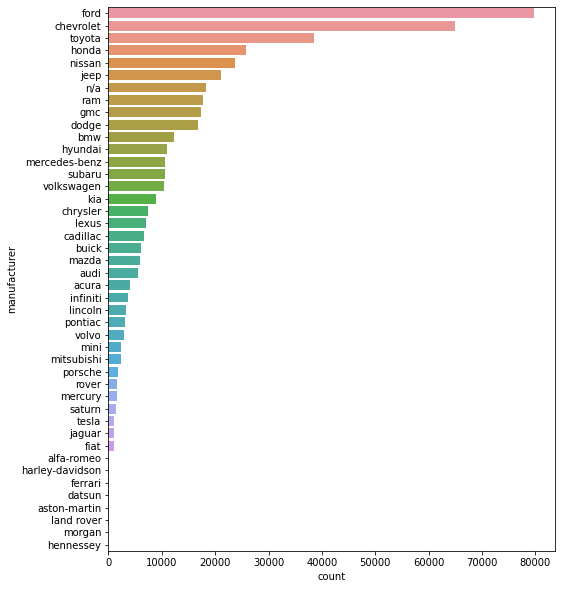

In [ ]:
fig = plt.figure(figsize=(8, 10))
sns.countplot(y='manufacturer', data=df.fillna('n/a'), order=df.fillna('n/a')['manufacturer'].value_counts().index); # order 옵션은 정렬

In [ ]:
len(df['model'].value_counts())
# 너무 많음

31520

In [ ]:
df['model'].value_counts()

f-150                 8370
silverado 1500        5964
1500                  4211
camry                 4033
accord                3730
                      ... 
2-ton                    1
c-class 3.0l sport       1
silverado 1500 ext       1
sc 300                   1
prius v5 hybrid          1
Name: model, Length: 31520, dtype: int64

In [ ]:
# 하나씩 보려면 for문 사용

for model, num in zip(df['model'].value_counts().index, df['model'].value_counts()):
  print(model, num)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2005-2020 f250/f350 1
thunderbird hardtop 1
f250 superduty v10 1
skyline gts 1
commercial f650 1
dakota extended cab 4x4 1
Flxible Clipper 1
1999 Oldsmobile Aurora 1
stinger gt1 1
1985 Bitter 1
1500 tradesman crew cab 1
ferio gt 1
outback 5sp 1
c-class c 240 1
4runner sport edition-awd-sunroof 1
tacoma sr double cab 5' bed i4 4x2 at (natl) 1
lancer evolution rs 1
entourage limited 1
e-35o superduty van 1
Saab 900 se 1
oddessy 1
stealth rt/tt 1
KARZ N MORE inc. 360-577-1713 Longview Wa Take Advantage Of Our Low Prices 1
super deluxe 8 1
laguna s-3 1
accord 4-door sedan ex-l 1
Oldsmobile Cutlass Rallye 1
RX 300 1
Freightliner M2 106 Medium Duty 1
jetta sportwagentdi 1
pacifica lx fwd 1
fusion energi titanium*lea 1
cooper eos beetle 1
tahoe ltz z71 4x4 heated leather moon gps 3 row 20s dvd 1
soul plus + 1
1987 Suzuki Samurai JX 1
expedition el el limited 1
savana 2500 exlp conversion 1
wrangler jk unlimited rubicon 4d sport utility automatic 1
golf tsi 

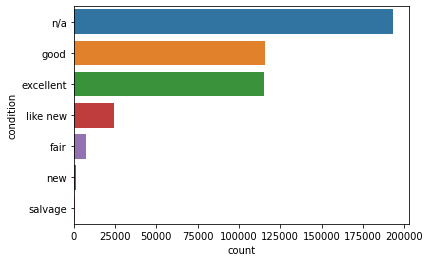

In [ ]:
sns.countplot(y='condition', data=df.fillna('n/a'), order=df.fillna('n/a')['condition'].value_counts().index)

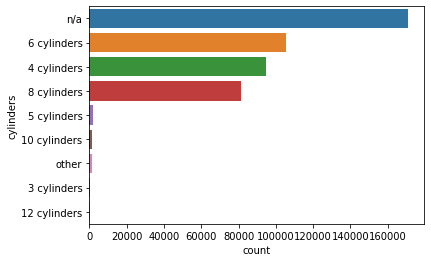

In [ ]:
sns.countplot(y='cylinders', data=df.fillna('n/a'), order=df.fillna('n/a')['cylinders'].value_counts().index)

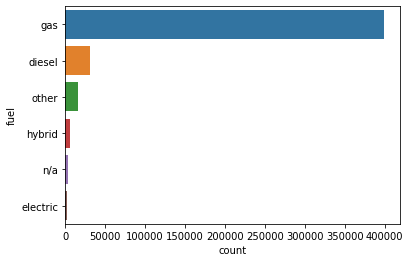

In [ ]:
sns.countplot(y='fuel', data=df.fillna('n/a'), order=df.fillna('n/a')['fuel'].value_counts().index)

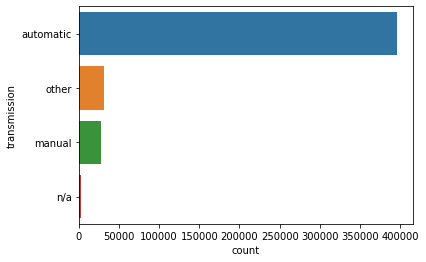

In [ ]:
sns.countplot(y='transmission', data=df.fillna('n/a'), order=df.fillna('n/a')['transmission'].value_counts().index)

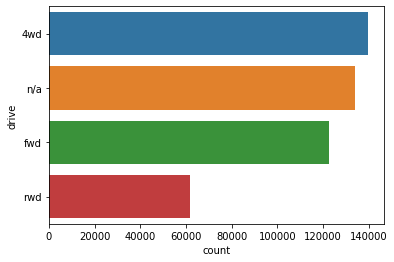

In [ ]:
sns.countplot(y='drive', data=df.fillna('n/a'), order=df.fillna('n/a')['drive'].value_counts().index)

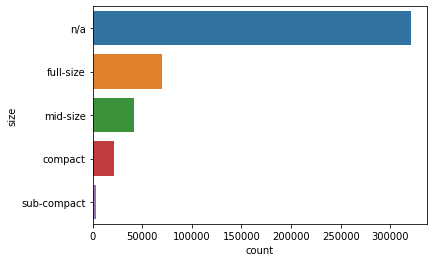

In [ ]:
sns.countplot(y='size', data=df.fillna('n/a'), order=df.fillna('n/a')['size'].value_counts().index)

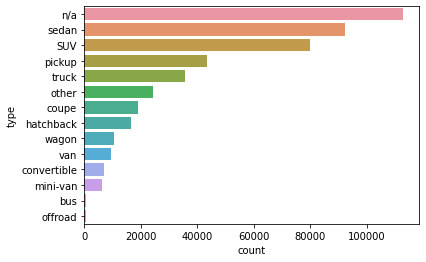

In [ ]:
sns.countplot(y='type', data=df.fillna('n/a'), order=df.fillna('n/a')['type'].value_counts().index)

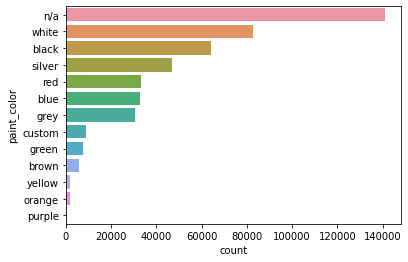

In [ ]:
sns.countplot(y='paint_color', data=df.fillna('n/a'), order=df.fillna('n/a')['paint_color'].value_counts().index)

## 수치형 데이터 분석

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

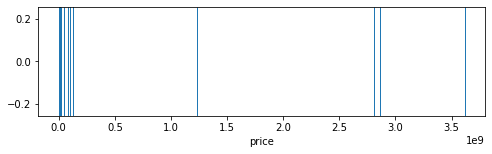

In [ ]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)

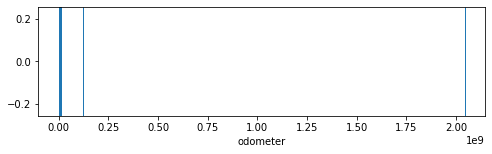

In [ ]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='odometer', data=df, height=1)

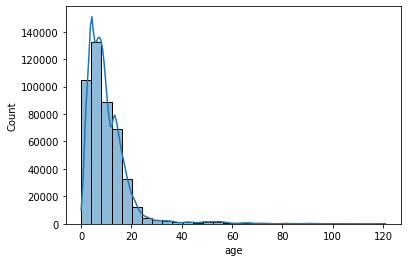

In [ ]:
sns.histplot(x='age', data=df, bins=30, kde=True)

## 데이터 클리닝

### 범주형 데이터

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

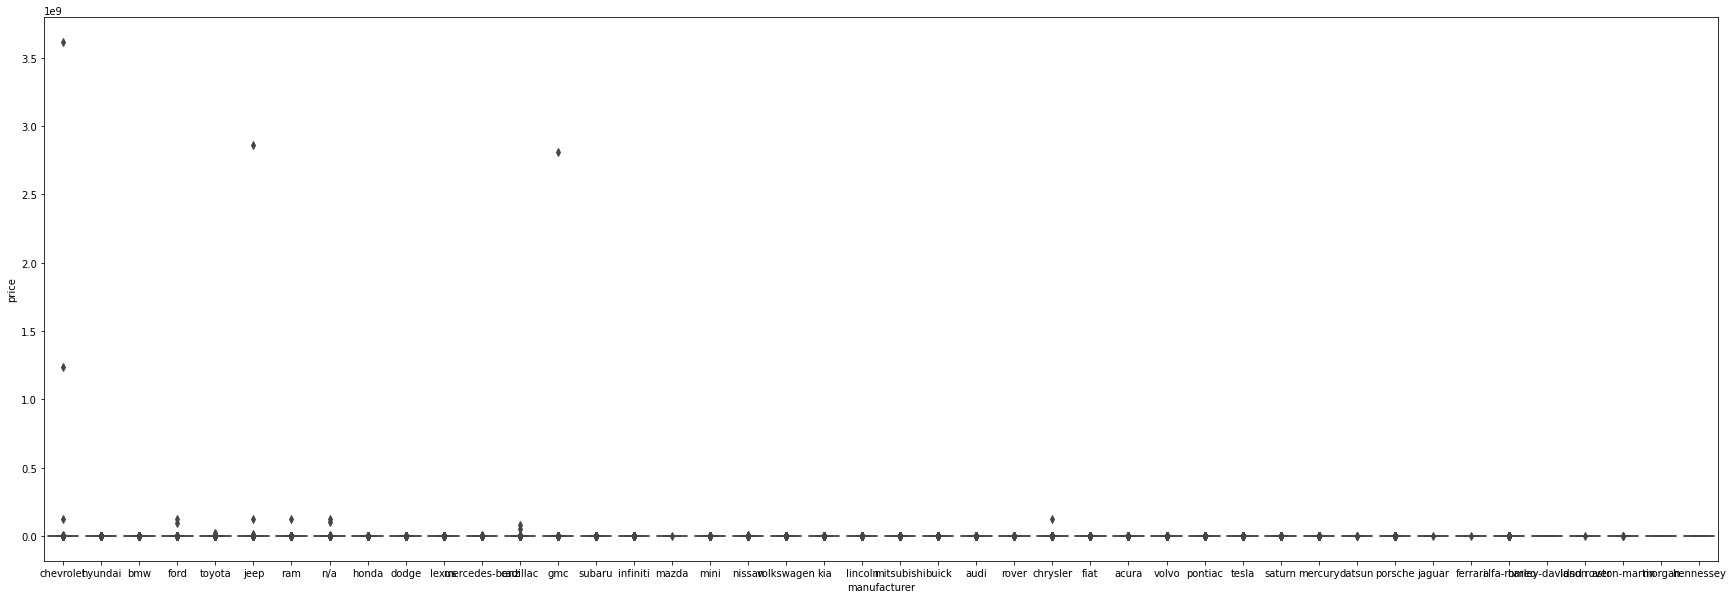

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.boxplot(x='manufacturer', y='price', data=df.fillna('n/a'))

# price에 outlier가 많아서 분석이 안되고 있음

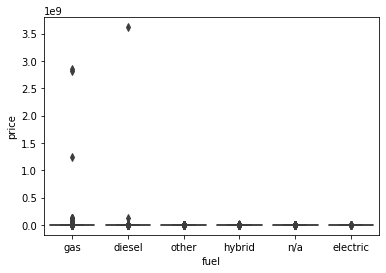

In [ ]:
sns.boxplot(x='fuel', y='price', data=df.fillna('n/a'))

# price에 outlier가 많아서 분석이 안되고 있음

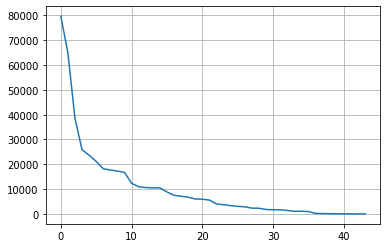

In [ ]:
# manufacturer 항목이 너무 많기 때문에 len으로 시각화

col = 'manufacturer'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)
plt.grid()

In [ ]:
counts.index

Index(['ford', 'chevrolet', 'toyota', 'honda', 'nissan', 'jeep', 'others',
       'ram', 'gmc', 'dodge', 'bmw', 'hyundai', 'mercedes-benz', 'subaru',
       'volkswagen', 'kia', 'chrysler', 'lexus', 'cadillac', 'buick', 'mazda',
       'audi', 'acura', 'infiniti', 'lincoln', 'pontiac', 'volvo', 'mini',
       'mitsubishi', 'porsche', 'rover', 'mercury', 'saturn', 'tesla',
       'jaguar', 'fiat', 'alfa-romeo', 'harley-davidson', 'ferrari', 'datsun',
       'aston-martin', 'land rover', 'morgan', 'hennessey'],
      dtype='object')

In [ ]:
# 상위 10개만 남기고 나머지는 others로 편입시킴
n_cat = 10
df[col] = df[col].apply(lambda s: s if str(s) not in counts.index[n_cat:] else 'others')

In [ ]:
df[col].value_counts()

others       134392
ford          79666
chevrolet     64977
toyota        38577
honda         25868
nissan        23654
jeep          21165
ram           17697
gmc           17267
dodge         16730
Name: manufacturer, dtype: int64

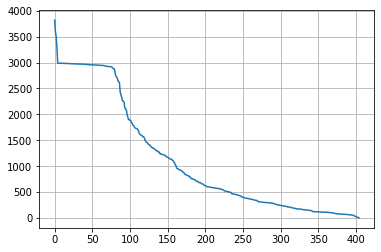

In [ ]:
col = 'region'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)
plt.grid()

In [ ]:
n_cat = 5
df[col] = df[col].apply(lambda s: s if str(s) not in counts.index[n_cat:] else 'others')

In [ ]:
df[col].value_counts()

others          441016
columbus          3818
rochester         3592
jacksonville      3504
springfield       3293
fayetteville      2990
Name: region, dtype: int64

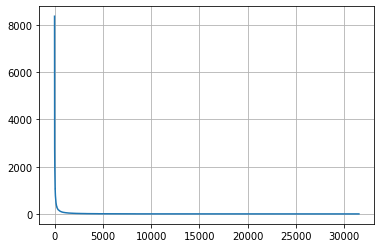

In [ ]:
col = 'model'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)
plt.grid()

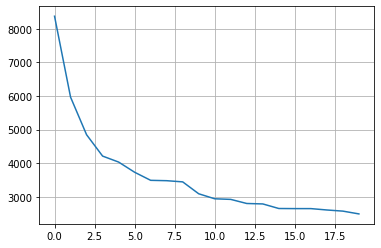

In [ ]:
plt.plot(range(len(counts[:20])), counts[:20])
plt.grid()

In [ ]:
# lambda함수 속도 개선
n_cat = 10
others = counts.index[n_cat:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

others            413556
f-150               8370
silverado 1500      5964
1500                4211
camry               4033
accord              3730
altima              3490
civic               3479
escape              3444
silverado           3090
Name: model, dtype: int64

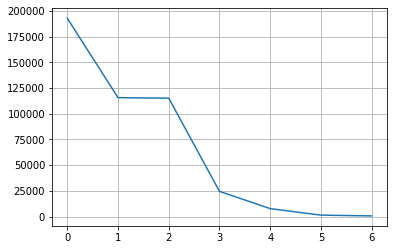

In [ ]:
col = 'condition'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)
plt.grid()

In [ ]:
n_cat = 3
others = counts.index[n_cat:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

good         115685
excellent    115206
others        34382
Name: condition, dtype: int64

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

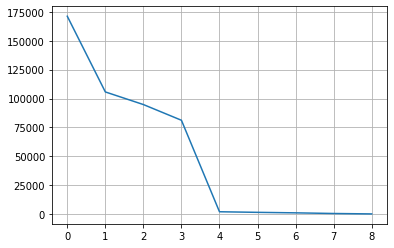

In [ ]:
col = 'cylinders'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)
plt.grid()

In [ ]:
n_cat = 4
others = counts.index[n_cat:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

6 cylinders    105677
4 cylinders     94767
8 cylinders     81179
others           5450
Name: cylinders, dtype: int64

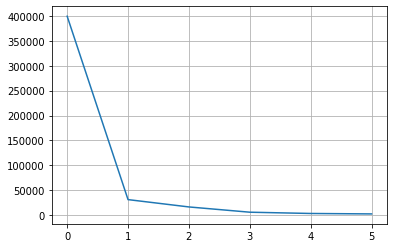

In [ ]:
col = 'fuel'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)
plt.grid()

In [ ]:
counts.fillna('others').index

Index(['gas', 'diesel', 'other', 'hybrid', 'others', 'electric'], dtype='object')

In [ ]:
n_cat = 3
others = counts.index[n_cat:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

gas       399399
diesel     31077
other      16359
others      8141
Name: fuel, dtype: int64

In [ ]:
n_cat = 2
others = counts.index[n_cat:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

gas       399399
diesel     31077
others     24500
Name: fuel, dtype: int64

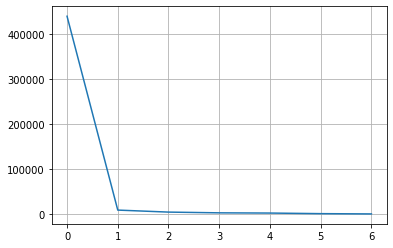

In [ ]:
col = 'title_status'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)
plt.grid()

In [ ]:
df.drop('title_status', axis=1, inplace=True)

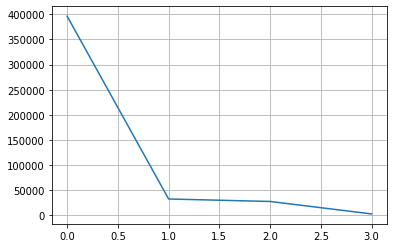

In [ ]:
col = 'transmission'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)
plt.grid()

In [ ]:
n_cat = 3
others = counts.index[n_cat:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

automatic    396322
other         32186
manual        27263
Name: transmission, dtype: int64

In [ ]:
df.loc[df[col] == 'other', col] = 'others'
df[col].value_counts()

automatic    396322
others        32186
manual        27263
Name: transmission, dtype: int64

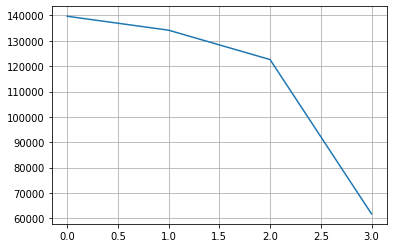

In [ ]:
col = 'drive'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)
plt.grid()

In [ ]:
df[col].value_counts()

4wd    139693
fwd    122602
rwd     61730
Name: drive, dtype: int64

In [ ]:
df[col].fillna('others', inplace=True)
df[col].value_counts()

4wd       139693
others    134188
fwd       122602
rwd        61730
Name: drive, dtype: int64

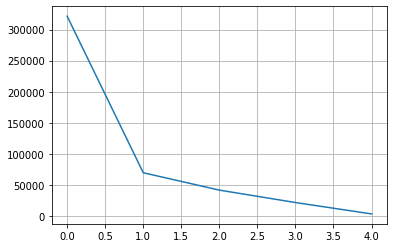

In [ ]:
col = 'size'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)
plt.grid()

In [ ]:
df[col].value_counts()

full-size      69736
mid-size       41782
compact        21825
sub-compact     3522
Name: size, dtype: int64

In [ ]:
n_cat = 2
others = counts.index[n_cat:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

full-size    69736
others       67129
Name: size, dtype: int64

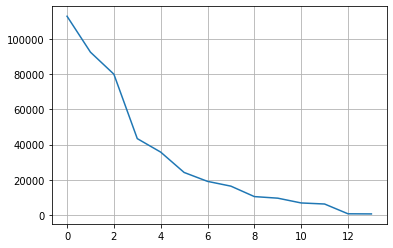

In [ ]:
col = 'type'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)
plt.grid()

In [ ]:
n_cat = 8
others = counts.index[n_cat:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

sedan        92364
SUV          79882
pickup       43343
truck        35694
others       34538
other        24160
coupe        19106
hatchback    16388
Name: type, dtype: int64

In [ ]:
df.loc[df[col] == 'other', col] = 'others'

In [ ]:
df[col].value_counts()

sedan        92364
SUV          79882
others       58698
pickup       43343
truck        35694
coupe        19106
hatchback    16388
Name: type, dtype: int64

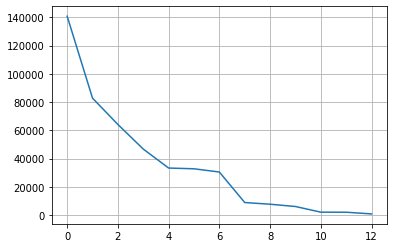

In [ ]:
col = 'paint_color'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)
plt.grid()

In [ ]:
n_cat = 7
others = counts.index[n_cat:]
df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')

In [ ]:
df[col].value_counts()

white     82786
black     64145
silver    46722
red       33274
blue      32746
grey      30455
others    27242
Name: paint_color, dtype: int64

### 수치형 데이터

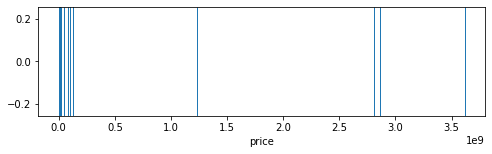

In [ ]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)

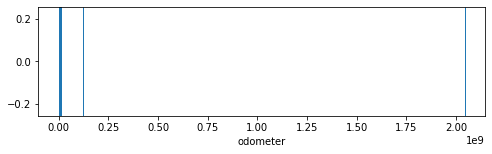

In [ ]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='odometer', data=df, height=1)

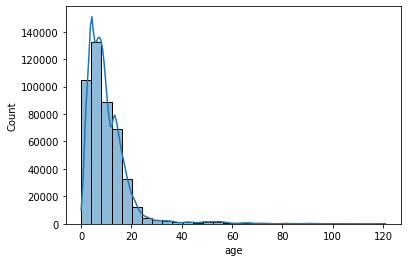

In [ ]:
sns.histplot(x='age', data=df, bins=30, kde=True)

In [ ]:
p1 = df['price'].quantile(0.99) # 상위 1%
p2 = df['price'].quantile(0.1) # 상위 90%
print(p1, p2)

59900.0 651.0


In [ ]:
df = df[(p1 > df['price']) & (df['price'] > p2)]

In [ ]:
o1 = df['odometer'].quantile(0.99)
o2 = df['odometer'].quantile(0.1)
print(o1, o2)

272803.10999999824 18593.0


In [ ]:
df = df[(o1 > df['odometer']) & (df['odometer'] > o2)]

In [ ]:
df.describe()

# mean과 median 값이 비슷하므로 합리적이라고 판단할 수 있음

,price,odometer,age
count,322166.000000,322166.000000,321666.000000
mean,15211.239072,103341.828089,10.220235
std,11248.543565,55049.524247,7.071633
min,652.000000,18596.000000,0.000000
25%,6500.000000,57454.000000,6.000000
50%,12000.000000,98850.000000,9.000000
75%,20990.000000,141000.000000,13.000000
max,59895.000000,272742.000000,121.000000


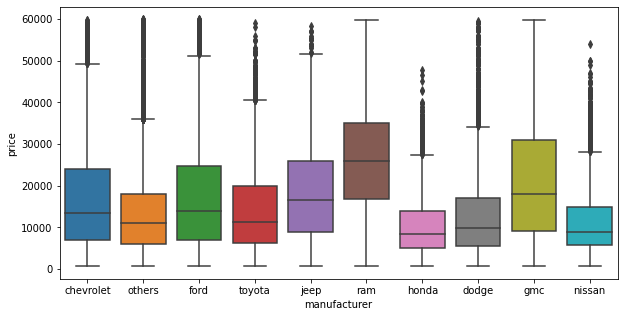

In [ ]:
# 데이터 클렌징이 끝났으니 boxplot 다시 그려보기

fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='manufacturer', y='price', data=df);

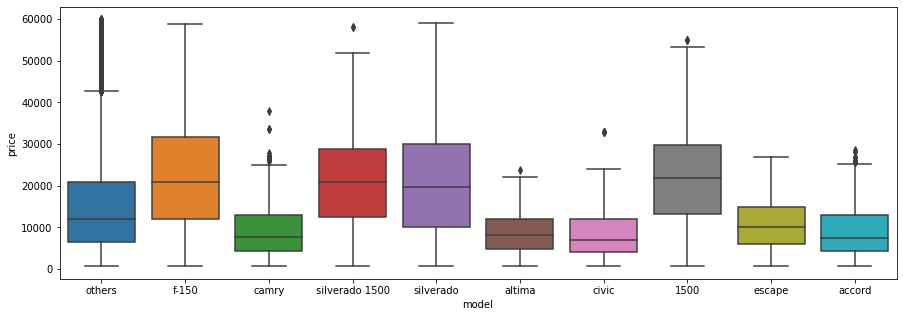

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='model', y='price', data=df);

## 컬럼 간 Correlation Heatmap 시각화

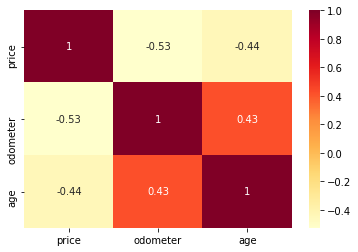

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

## 모델 학습을 위한 데이터 전처리 

### StandardScaler 수치형 데이터 표준화 및 범주형 데이터 one-hot 벡터로 변경


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기

X_num = df[['odometer', 'age']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

# get_dummies를 이용해 범주형 데이터를 one-hot 벡터로 변경하기
X_cat = df.drop(['price', 'odometer', 'age'], axis=1)
X_cat = pd.get_dummies(X_cat)

# x, y
x = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [ ]:
x.head()

,odometer,age,region_columbus,region_fayetteville,region_jacksonville,region_others,region_rochester,region_springfield,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_jeep,manufacturer_nissan,manufacturer_others,manufacturer_ram,manufacturer_toyota,model_1500,model_accord,model_altima,model_camry,model_civic,model_escape,model_f-150,model_others,model_silverado,model_silverado 1500,condition_excellent,condition_good,condition_others,cylinders_4 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_others,fuel_diesel,fuel_gas,fuel_others,transmission_automatic,transmission_manual,transmission_others,drive_4wd,drive_fwd,drive_others,drive_rwd,size_full-size,size_others,type_SUV,type_coupe,type_hatchback,type_others,type_pickup,type_sedan,type_truck,paint_color_black,paint_color_blue,paint_color_grey,paint_color_others,paint_color_red,paint_color_silver,paint_color_white
0,-1.282480,0.110267,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,-0.176965,-0.455374,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,-0.296022,0.675908,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1.574188,5.201037,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.229942,0.817318,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
x.shape

(322166, 61)

In [ ]:
x.isna().sum()

# age가 비어있음

odometer                 0
age                    500
region_columbus          0
region_fayetteville      0
region_jacksonville      0
                      ... 
paint_color_grey         0
paint_color_others       0
paint_color_red          0
paint_color_silver       0
paint_color_white        0
Length: 61, dtype: int64

In [ ]:
x['age'].mean()

-1.6971181595987114e-15

In [ ]:
x.fillna(0, inplace=True)

In [ ]:
x.isna().sum()

odometer               0
age                    0
region_columbus        0
region_fayetteville    0
region_jacksonville    0
                      ..
paint_color_grey       0
paint_color_others     0
paint_color_red        0
paint_color_silver     0
paint_color_white      0
Length: 61, dtype: int64

### 학습데이터와 테스트데이터 분리


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## XGBoost Regression

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(x_train, y_train)

[14:28:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
pred = model_reg.predict(x_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

3768.449601423142
5598.464267631778


## 모델 학습 결과 심화 분석


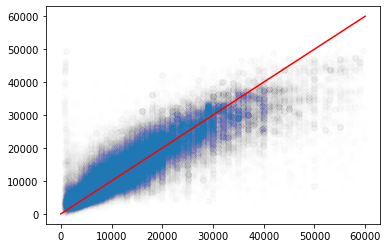

In [ ]:
plt.scatter(x=y_test, y=pred, alpha=0.005) # alpha : 낮을수록 흐림
plt.plot([0,60000], [0,60000], 'r-') # r- : 빨간색 선

# 실제로 싼데 비싸다고 판단 or 실제로 비싼데 싸다고 판단

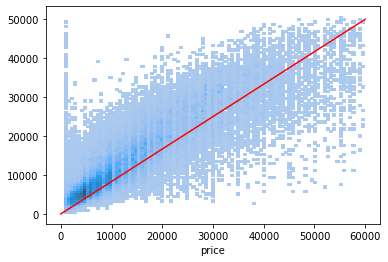

In [ ]:
sns.histplot(x=y_test, y=pred)
plt.plot([0,60000], [0,50000], 'r-') # r- : 빨간색 선

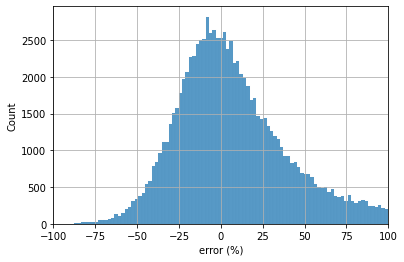

In [ ]:
# 에러율 히스토그램

err = (pred - y_test) / y_test * 100
sns.histplot(err)
plt.xlabel('error (%)')
plt.xlim(-100, 100)
plt.grid()

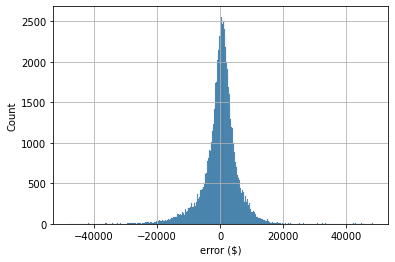

In [ ]:
# 에러값 히스토그램

err = pred - y_test
sns.histplot(err)
plt.xlabel('error ($)')
plt.grid()